In [15]:
#sklearn.impute.SimpleImputer可以轻松的将均值，中值，或者其他常用的数值填补到数据中
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [16]:
boston=load_boston()
x_full,y_full=boston.data,boston.target
n_samples=x_full.shape[0]
n_features=x_full.shape[1]

0

In [3]:
#给50%的数据给它赋空值
rng=np.random.RandomState(0)
missing_rate=0.5
n_missing_samples=int(np.floor(n_samples*n_features*missing_rate))
n_missing_samples

3289

In [4]:
rng.randint(1,10,20)

array([6, 1, 4, 4, 8, 4, 6, 3, 5, 8, 7, 9, 9, 2, 7, 8, 8, 9, 2, 6])

In [5]:
#在为这50%的数据找到列索引，行索引
missing_features=rng.randint(0,n_features,n_missing_samples)
missing_samples=rng.randint(0,n_samples,n_missing_samples)

In [6]:
missing_features

array([9, 8, 9, ..., 7, 1, 9])

In [7]:
missing_samples

array([175, 109, 416, ..., 140, 300, 314])

In [8]:
x_missing=x_full.copy()
y_missing=y_full.copy()
x_missing[missing_samples,missing_features]=np.nan
x_missing=pd.DataFrame(x_missing)
x_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,0.0,0.538,NaN,65.2,NaN,1.0,296.0,NaN,396.90,4.98
1,NaN,0.0,7.07,NaN,0.469,NaN,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,NaN,NaN,7.07,NaN,NaN,NaN,NaN,4.9671,NaN,242.0,17.8,NaN,4.03
3,0.03237,NaN,NaN,0.0,0.458,NaN,NaN,NaN,NaN,222.0,NaN,394.63,2.94
4,NaN,0.0,2.18,0.0,NaN,NaN,NaN,6.0622,NaN,NaN,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,11.93,NaN,0.573,6.593,NaN,NaN,NaN,NaN,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,NaN,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,NaN,NaN,NaN,NaN,2.1675,1.0,NaN,NaN,396.90,NaN
504,0.10959,0.0,11.93,0.0,NaN,6.794,89.3,NaN,NaN,NaN,21.0,393.45,NaN


In [9]:
y_missing

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
# 使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(missing_values=np.nan,strategy="mean")
#将x_missing按照上面的填充策略训练，并且导出到新的x_missing中
x_missing_mean=imp_mean.fit_transform(x_missing)
x_missing_mean=pd.DataFrame(x_missing_mean)
x_missing_mean.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [11]:
#使用0进行填补
imp_0=SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0)
X_missing_0=imp_0.fit_transform(x_missing)
X_missing_0=pd.DataFrame(X_missing_0)
X_missing_0

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,0.0000,1.0,296.0,0.0,396.90,4.98
1,0.00000,0.0,7.07,0.0,0.469,0.000,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.00000,0.0,7.07,0.0,0.000,0.000,0.0,4.9671,0.0,242.0,17.8,0.00,4.03
3,0.03237,0.0,0.00,0.0,0.458,0.000,0.0,0.0000,0.0,222.0,0.0,394.63,2.94
4,0.00000,0.0,2.18,0.0,0.000,0.000,0.0,6.0622,0.0,0.0,18.7,396.90,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00000,0.0,11.93,0.0,0.573,6.593,0.0,0.0000,0.0,0.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.000,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.000,0.000,0.0,2.1675,1.0,0.0,0.0,396.90,0.00
504,0.10959,0.0,11.93,0.0,0.000,6.794,89.3,0.0000,0.0,0.0,21.0,393.45,0.00


In [12]:
#随机森林进行填充空值
x_missing_reg=x_missing.copy()
x_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,0.0,0.538,NaN,65.2,NaN,1.0,296.0,NaN,396.90,4.98
1,NaN,0.0,7.07,NaN,0.469,NaN,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,NaN,NaN,7.07,NaN,NaN,NaN,NaN,4.9671,NaN,242.0,17.8,NaN,4.03
3,0.03237,NaN,NaN,0.0,0.458,NaN,NaN,NaN,NaN,222.0,NaN,394.63,2.94
4,NaN,0.0,2.18,0.0,NaN,NaN,NaN,6.0622,NaN,NaN,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,11.93,NaN,0.573,6.593,NaN,NaN,NaN,NaN,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,NaN,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,NaN,NaN,NaN,NaN,2.1675,1.0,NaN,NaN,396.90,NaN
504,0.10959,0.0,11.93,0.0,NaN,6.794,89.3,NaN,NaN,NaN,21.0,393.45,NaN


In [13]:
#找出数据集中缺失值从小到大排列的特征们的顺序
sortindex=np.argsort(x_missing_reg.isnull().sum(axis=0)).values

In [14]:
sortindex

array([ 6,  0,  7,  8,  1,  4,  5,  2,  9, 10, 12,  3, 11], dtype=int64)

In [92]:
'''
选中最小的那个特征列表，其余没用到的特征用0填充，将选中的特征当做标签，
将为选中的特征和原始标签组成一个新的特征矩阵,将新标签中，不是空值的当做train_y
空值当做test_y
'''
df=x_missing_reg.copy()
fillc=df.iloc[:,6]
df=pd.concat([df.iloc[:,df.columns!=6],pd.DataFrame(y_full)],axis=1)
df_0=SimpleImputer(missing_values=np.nan
                   ,strategy="constant"
                   ,fill_value=0).fit_transform(df)
df_0

array([[0.0000e+00, 1.8000e+01, 0.0000e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [0.0000e+00, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [0.0000e+00, 0.0000e+00, 7.0700e+00, ..., 0.0000e+00, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 0.0000e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 0.0000e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 7.8800e+00,
        1.1900e+01]])

In [87]:
#将非空的标签当做train_y
train_y=fillc[fillc.notnull()]
#将空的标签当做test_y
test_y=fillc[fillc.isnull()]

In [94]:
#将train_y对应的下标所对应的数据特征当做train_x
#将test_y对应的下标所对应的数据特征当做test_x
train_x=df_0[train_y.index,:]
test_x=df_0[test_y.index,:]
train_x.shape

(324, 13)

In [95]:
test_x.shape

(182, 13)

In [96]:
rfr=RandomForestRegressor(n_estimators=25)
rfr=rfr.fit(train_x,train_y)
Ypredict=rfr.predict(test_x)

In [98]:
Ypredict.shape

(182,)

In [116]:
#将预测出来的结果，填充到第6列的缺失值中去
df_x_missing=x_missing_reg.copy()
df_x_missing.loc[df_x_missing.iloc[:,6].isnull(),6]=Ypredict
df_x_missing.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [113]:
for i in sortindex:
    df=x_missing_reg.copy()
    fillc=df.iloc[:,i]
    df=pd.concat([df.iloc[:,df.columns!=i],pd.DataFrame(y_full)],axis=1)
    df_0=SimpleImputer(missing_values=np.nan
                       ,strategy="constant"
                       ,fill_value=0).fit_transform(df)
    train_y=fillc[fillc.notnull()]
    test_y=fillc[fillc.isnull()]
    train_x=df_0[train_y.index,:]
    test_x=df_0[test_y.index,:]
    rfr=RandomForestRegressor(n_estimators=30)
    rfr=rfr.fit(train_x,train_y)
    Ypredict=rfr.predict(test_x)
    x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i]=Ypredict

In [115]:
x_missing_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [120]:
#最后在对这些填充的数据进行模型评估
X_data=[x_full,x_missing_mean,X_missing_0,x_missing_reg]
score=[]
for x in X_data:
    estimator=RandomForestRegressor(random_state=0,n_estimators=255)
    score_s=cross_val_score(estimator
                            ,x
                            ,y_full
                            ,cv=5
                            ,scoring="neg_mean_squared_error").mean()
    score.append(score_s*-1)

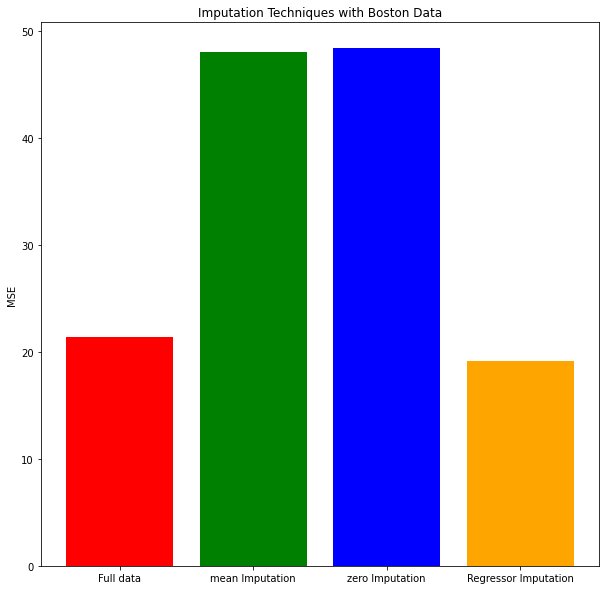

In [150]:
x_labels=["Full data"
          ,"mean Imputation"
          ,"zero Imputation"
          ,"Regressor Imputation"]
[*zip(x_labels,score)]
colors=["r","g","b","orange"]
plt.figure(figsize=(10,10))
ax=plt.subplot(1,1,1)
for i in range(len(x_labels)):
    ax.bar(i,score[i],color=colors[i],align="center")
ax.set_title("Imputation Techniques with Boston Data")
ax.set_ylabel("MSE")
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels)
plt.show()

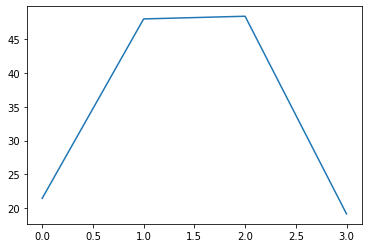